**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a pretty good job overall, but there are a couple of problems that need to be fixed before the code can be accepted. Good luck!

## Telecom client churn forecast using Machine Learning

Interconnect telecom would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

### Interconnect's services

Interconnect mainly provides two types of services:

1. Landline communication. The telephone can be connected to several lines simultaneously.
2. Internet. The network can be set up via a telephone line (DSL, *digital subscriber line*) or through a fiber optic cable.

Some other services the company provides include:

- Internet security: antivirus software (*DeviceProtection*) and a malicious website blocker (*OnlineSecurity*)
- A dedicated technical support line (*TechSupport*)
- Cloud file storage and data backup (*OnlineBackup*)
- TV streaming (*StreamingTV*) and a movie directory (*StreamingMovies*)

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

### Data Description

The data consists of files obtained from different sources:

- `contract.csv` — contract information
- `personal.csv` — the client's personal data
- `internet.csv` — information about Internet services
- `phone.csv` — information about telephone services

In each file, the column `customerID` contains a unique code assigned to each client.

The contract information is valid as of February 1, 2020.

### Objectives

The objectives of this project is to:
- Build a machine learning model to forecast Interconnect telecom's client churn
- Apply exploratory data analysis in determining whether special promotional services and plan options will discourage client churn
- Analyze the speed and quality of prediction, time required for training, etc.

<hr>

 # Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#open_the_data">Open the data file and study the general information</a></li>
        <li><a href="#data_preprocessing">Data Preprocessing</a></li>
        <li><a href="#data_visualization">Exploratory Data Analysis</a></li>
        <li><a href="#modeling_process">Modeling Process</a></li>
        <li><a href="#model_training">Model Training</a></li>
        <li><a href="#model_analysis">Model Analysis</a></li>
        <li><a href="#model_testing">Model Testing</a></li>
        <li><a href="#overall_conclusion">Overall Conclusion</a></li>
    </ol>
</div>
<br>
<hr>

<div id="open_the_data">
    <h2>Open the data and study the general information</h2> 
</div>

We require the following libraries: *pandas* and *numpy* for data preprocessing and manipulation, *matplotlib* and *seaborn* for data visualization, *scikit-learn* for building our machine learning algorithms

In [1]:
import numpy as np
import pandas as pd
import time
from datetime import datetime
from IPython.display import display

# matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn for statistical data visualization
import seaborn as sns

# import module for splitting and cross-validation using gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

# import modules for preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None # to avoid SettingWithCopyWarning after scaling

# import machine learning module from the sklearn library
from sklearn.dummy import DummyClassifier # import dummy classifier
from sklearn.tree import DecisionTreeClassifier # import decision tree classifier
from sklearn.linear_model import LogisticRegression # import logistic regression 
from sklearn.ensemble import RandomForestClassifier # import random forest algorithm
from catboost import CatBoostClassifier # import catboost classifier
from lightgbm import LGBMClassifier # import lightgbm classifier
from xgboost import XGBClassifier # import xgboost classifier

# import metrics for sanity check on model
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

# import warnings
import warnings
warnings.filterwarnings('ignore')

# import sklearn utilities
from sklearn.utils import shuffle

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


In [2]:
# read the data
try:
    contract_data = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Final Project/final_provider/contract.csv')
    internet_data = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Final Project/final_provider/internet.csv')
    personal_data = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Final Project/final_provider/personal.csv')
    phone_data = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Final Project/final_provider/phone.csv')
except:
    contract_data = pd.read_csv('https://code.s3.yandex.net/datasets/final_provider/contract.csv')
    internet_data = pd.read_csv('https://code.s3.yandex.net/datasets/final_provider/internet.csv')
    personal_data = pd.read_csv('https://code.s3.yandex.net/datasets/final_provider/personal.csv')
    phone_data = pd.read_csv('https://code.s3.yandex.net/datasets/final_provider/phone.csv')
print('Data has been read correctly!')

Data has been read correctly!


In [3]:
# function to determine if columns in file have null values
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")
        
# function to display general information about the dataset
def get_info(df):
    """
    This function uses the head(), info(), describe(), shape() and duplicated() 
    methods to display the general information about the dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  # check this out
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [4]:
# study the general information about the contract dataset 
print('General information about the contract dataset')
get_info(contract_data)

General information about the contract dataset
----------------------------------------------------------------------------------------------------
Head:



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


----------------------------------------------------------------------------------------------------


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043
unique,7043,77,5,3,2,4,6531
top,7590-VHVEG,2014-02-01,No,Month-to-month,Yes,Electronic check,
freq,1,366,5174,3875,4171,2365,11



Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(7043, 8)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




In [5]:
# study the general information about the internet dataset 
print('General information about the internet dataset')
get_info(internet_data)

General information about the internet dataset
----------------------------------------------------------------------------------------------------
Head:



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


----------------------------------------------------------------------------------------------------


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785



Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(5517, 8)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




In [6]:
# study the general information about the personal dataset 
print('General information about the personal dataset')
get_info(personal_data)

General information about the personal dataset
----------------------------------------------------------------------------------------------------
Head:



,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


----------------------------------------------------------------------------------------------------


,customerID,gender,Partner,Dependents
count,7043,7043,7043,7043
unique,7043,2,2,2
top,7590-VHVEG,Male,No,No
freq,1,3555,3641,4933



Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(7043, 5)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




In [7]:
# study the general information about the phone dataset 
print('General information about the phone dataset')
get_info(phone_data)

General information about the phone dataset
----------------------------------------------------------------------------------------------------
Head:



,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


----------------------------------------------------------------------------------------------------


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390



Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(6361, 2)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




#### Conclusion

By looking at the general information about the data, we find that:
 - `contract_data` has 7043 rows and 8 columns with no missing values and no duplicated values
 - `internet_data` has 5517 rows and 8 columns with no missing values and no duplicated values
 - `personal_data` has 7043 rows and 5 columns with no missing values and no duplicated values
 - `phone_data` has 6361 rows and 2 columns with no missing values and no duplicated values
 
We need to change datatype to the right datatype. For instance, in `contract_data`, we need to change `BeginDate`, `EndDate` to `Datetime` and `TotalCharges` to `float`. We also need to preprocess the data and generate new features for machine learning.

<div id="data_preprocessing">
    <h2>Data Preprocessing</h2> 
</div>

In this section, we would be wrangling the data. We would have to merge the dataset, replace column names, change datatypes and perform feature engineering. 

### Merge Datasets

Before we begin to preprocess the data, we can merge all the individual datasets into one dataframe using the `merge()` function in pandas.

In [8]:
# joining datasets 
merged_df = pd.merge(contract_data, internet_data, on="customerID", how='left')
merged_df1 = pd.merge(merged_df, personal_data, on="customerID", how='left')
merged_df2 = pd.merge(merged_df1, phone_data, on="customerID", how='left')
merged_df2 = merged_df2.fillna('No')
merged_df2.sample(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
93,6067-NGCEU,2014-09-01,No,Month-to-month,Yes,Credit card (automatic),111.05,7107,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Female,0,No,No,Yes
2716,7883-ROJOC,2018-07-01,No,Month-to-month,No,Mailed check,44.90,839.65,DSL,No,No,No,No,No,No,Female,0,Yes,No,No
3517,0748-RDGGM,2014-02-01,2019-12-01 00:00:00,One year,Yes,Bank transfer (automatic),109.50,7534.65,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Male,0,Yes,No,No
6505,7018-FPXHH,2015-06-01,No,Two year,Yes,Bank transfer (automatic),59.80,3457.45,DSL,Yes,Yes,Yes,No,No,No,Male,0,Yes,Yes,No
1670,5047-LHVLY,2019-09-01,2019-10-01 00:00:00,Month-to-month,Yes,Mailed check,50.15,50.15,DSL,No,No,Yes,No,No,No,Male,1,No,Yes,No


In [9]:
# create copy of dataset
telecom_df = merged_df2.copy()
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Pandas uses inner merge by default, which means we're losing data on customers who don't use all types of services (for example, those who use the internet, but not the phone).

</div>

<div class="alert alert-info">
<b>Student's comment</b>

Done !!!
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Fixed!

</div>

### Replace column names

The next step in data preprocessing will be to replace columns names in our dataset.

In [10]:
# rename columns
telecom_df = telecom_df.rename(columns={'customerID': 'customer_id', 'BeginDate': 'begin_date', 'EndDate': 'end_date', 'Type': 'type',
       'PaperlessBilling': 'paperless_billing', 'PaymentMethod': 'payment_method', 'MonthlyCharges': 'monthly_charges', 'TotalCharges': 'total_charges',
       'gender': 'gender', 'SeniorCitizen': 'senior_citizen', 'Partner': 'partner', 'Dependents': 'dependents', 'MultipleLines': 'multiple_lines',
       'InternetService': 'internet_service', 'OnlineSecurity': 'online_security', 'OnlineBackup': 'online_backup', 'DeviceProtection': 'device_protection',
       'TechSupport': 'tech_support', 'StreamingTV': 'streaming_tv', 'StreamingMovies': 'streaming_movies'})

We renamed column names so that the column names will be uniform. i.e., using snake case for improved readability. The `rename()` function in pandas is used to make these changes.

### Change Datatypes 

Next, we change datatypes to the right format. For instance, `begin_date` and `end_date` will be changed to `Datetime`, `monthly_charges` and `total_charges` to `float32`, `senior_citizen` to `int32` datatypes.

In [11]:
# function to change data to the right type
def change_datatype(df, cols, type_val):
    for col in cols:
        df[col] = df[col].astype(type_val)

# create new end date feature
list_value = []
for value in telecom_df.end_date:
    if value != 'No':
        datetime_value = datetime.strptime(value, '%Y-%m-%d %H:%M:%S')
        list_value.append(datetime_value)
    else:
        list_value.append(datetime.now())
EndDate_value = pd.to_datetime(list_value)
telecom_df.insert(3, 'end_date_value', EndDate_value)

# prepare TotalChargers 
telecom_df.loc[telecom_df['total_charges'].isin([' ']),'total_charges'] = 0

# change datatypes
change_datatype(telecom_df, ['begin_date'], 'datetime64[ns]')
change_datatype(telecom_df, ['monthly_charges', 'total_charges'], 'float32')
change_datatype(telecom_df, ['senior_citizen'], 'int32')

In [12]:
# check data information
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   end_date_value     7043 non-null   datetime64[ns]
 4   type               7043 non-null   object        
 5   paperless_billing  7043 non-null   object        
 6   payment_method     7043 non-null   object        
 7   monthly_charges    7043 non-null   float32       
 8   total_charges      7043 non-null   float32       
 9   internet_service   7043 non-null   object        
 10  online_security    7043 non-null   object        
 11  online_backup      7043 non-null   object        
 12  device_protection  7043 non-null   object        
 13  tech_support       7043 non-null   object        
 14  streamin

### Feature engineering

Here, we will create new features such as length of tenure `tenure`, the target end date `exited` denoted as 0 for no churn and 1 for churn, `service_count` denoting the number of products (or services) the customer is currently using, `has_crcard` indicating the customer uses credit card for payment, `year`, `month` and `dayofweek` the customer began using Interconnect's services.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Tenure is definitely a good feature, but note that using a combination of tenure and `begin_date` or its components introduces data leakage: it's easy to figure out the `end_date` from the combination of these features, and then we basically know the target. I can see that you dropped `begin_date` and `end_date` when getting to modeling, so to fix this problem, you'll need to drop date components as well.

</div>

<div class="alert alert-info">
<b>Student's comment</b>

Fixed!!!. I only left removing them late because of the EDA. After the EDA, I removed all the date components including `tenure` !!!
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Ok, although note that it's only the combination of `tenure` and `begin_date` that's problematic! `tenure` by itself doesn't leak target for example, so it's safe to use

</div>

In [13]:
# change date type to datetime and split into day, month and year
def new_date_features(df):
    columns = df.columns.tolist()
    idx = [columns.index(x) for x in columns if 'begin_date' in x][0]
    
    df[columns[idx]] = pd.to_datetime(df[columns[idx]])
    df['dayofweek'] = df[columns[idx]].dt.day_name()
    df['month'] = df[columns[idx]].dt.month_name()
    df['year'] = df[columns[idx]].dt.year
    return df;    

In [14]:
# add new features to data
new_date_features(telecom_df)
telecom_df['tenure'] = telecom_df['end_date_value'].dt.year - telecom_df['begin_date'].dt.year
telecom_df['has_crcard'] = [1 if x == 'Credit card (automatic)' else 0 for x in telecom_df['payment_method']]
telecom_df['exited'] = [1 if x != 'No' else 0 for x in telecom_df['end_date']]
telecom_df['service_count'] = [x.count('Yes') for x in zip(telecom_df['online_security'], telecom_df['online_backup'], telecom_df['device_protection'], 
                                                           telecom_df['tech_support'], telecom_df['streaming_tv'], telecom_df['streaming_movies'])]
change_datatype(telecom_df, ['year', 'tenure', 'has_crcard', 'exited', 'service_count'], 'int32') # reduce memory usage by changing datatypes

In [15]:
# check dataframe
telecom_df.head()

,customer_id,begin_date,end_date,end_date_value,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,...,partner,dependents,multiple_lines,dayofweek,month,year,tenure,has_crcard,exited,service_count
0,7590-VHVEG,2020-01-01,No,2022-01-05 09:37:40.198938,Month-to-month,Yes,Electronic check,29.850000,29.850000,DSL,...,Yes,No,No,Wednesday,January,2020,2,0,0,1
1,5575-GNVDE,2017-04-01,No,2022-01-05 09:37:40.198938,One year,No,Mailed check,56.950001,1889.500000,DSL,...,No,No,No,Saturday,April,2017,5,0,0,2
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,2019-12-01 00:00:00.000000,Month-to-month,Yes,Mailed check,53.849998,108.150002,DSL,...,No,No,No,Tuesday,October,2019,0,0,1,2
3,7795-CFOCW,2016-05-01,No,2022-01-05 09:37:40.199887,One year,No,Bank transfer (automatic),42.299999,1840.750000,DSL,...,No,No,No,Sunday,May,2016,6,0,0,3
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,2019-11-01 00:00:00.000000,Month-to-month,Yes,Electronic check,70.699997,151.649994,Fiber optic,...,No,No,No,Sunday,September,2019,0,0,1,0


Using list comprehension, we have been able to generate new features that are relevant to the dataset. We engineered features such as `tenure`, `exited`, `service_count`, `has_crcard`, `year`, `month` and `dayofweek`. All these features will help our machine learning model to avoid bias when building the model. We also don't want to have too many features to avoid high variance - when the model is too complex that it doesn't generalize well to the test data or it *overfits* the data.

In [16]:
# recheck dataframe information
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   end_date_value     7043 non-null   datetime64[ns]
 4   type               7043 non-null   object        
 5   paperless_billing  7043 non-null   object        
 6   payment_method     7043 non-null   object        
 7   monthly_charges    7043 non-null   float32       
 8   total_charges      7043 non-null   float32       
 9   internet_service   7043 non-null   object        
 10  online_security    7043 non-null   object        
 11  online_backup      7043 non-null   object        
 12  device_protection  7043 non-null   object        
 13  tech_support       7043 non-null   object        
 14  streamin

#### Conclusion

We carried out data preprocessing in order to merge the datasets, replace column names, change datatype, and generate new features for machine learning. We applied the SQL-flavored merging with pandas to merge the dataset. We renamed column names for improved readability, and change datatypes to the right format in order to reduce memory requirement during computation. We performed feature engineering in order to generate new features that will be helpful in exploring the data and useful for our machine learning process. Now the data is ready for further exploration.

<div id="data_visualization">
    <h2>Exploratory Data Analysis</h2> 
</div>

In exploring the data, we would be asking various questions that need answers in order to uncover or understand the data.

### What payment type and payment methods are unique to Interconnect's customer?

In [17]:
unique_payment_type_count = (telecom_df['type'].value_counts() / telecom_df['type'].value_counts().sum() * 100).tolist()   

# unique payment type
unique_payment_type = telecom_df['type'].value_counts().reset_index().rename(columns={'index': 'type', 'type': 'unique count'})
unique_payment_type['percentage split (%)'] = ['{:.2f}'.format(x) for x in unique_payment_type_count]
unique_payment_type

,type,unique count,percentage split (%)
0,Month-to-month,3875,55.02
1,Two year,1695,24.07
2,One year,1473,20.91


In [18]:
unique_payment_method_count = (telecom_df['payment_method'].value_counts() / telecom_df['payment_method'].value_counts().sum() * 100).tolist()

# unique payment method
unique_payment_method = telecom_df['payment_method'].value_counts().reset_index().rename(columns={'index': 'payment method', 'payment_method': 'count'})
unique_payment_method['% payment split'] = ['{:.2f}'.format(x) for x in unique_payment_method_count]
unique_payment_method

,payment method,count,% payment split
0,Electronic check,2365,33.58
1,Mailed check,1612,22.89
2,Bank transfer (automatic),1544,21.92
3,Credit card (automatic),1522,21.61


From the analysis above, we see that most Interconnect customers prefer month-to-month payment with 55% of payment done using this medium. Also, electronic check was frequently used to make payment amongst the payment method available.

### Can we deduce a relationship between payment method and total charges?

In [19]:
# total charges grouped by payment method
total_charges_grouped = telecom_df.groupby('payment_method', as_index=False).agg({'total_charges': 'sum'}).sort_values(
    by='total_charges', ascending=False, ignore_index=True)
total_charges_grouped

,payment_method,total_charges
0,Electronic check,4944903.50
1,Bank transfer (automatic),4748280.00
2,Credit card (automatic),4671593.50
3,Mailed check,1691392.25


We can agree that customers making payment with electronic check had the highest total charges. With this knowledge, marketing team can channel more marketing campaign to make these set of customers use more services. Customers who mail-in check on the other hand had the lowest total charges. Here, marketing team can device new marketing campaign to make the these sets of customers to embrace either the bank transfer method or the electronic check method. If we can get all the customers sending in mail-in checks to use the electronic check, then we would have more total customer charges which translate to more revenue for Interconnect telecom.

### Can we deduce a relationship between payment type and total monthly charges?

In [20]:
# total monthly charges grouped by payment type
(telecom_df.groupby('type', as_index=False)
     .agg({'monthly_charges': 'sum', 'total_charges': 'sum'})
     .sort_values(by='total_charges', ascending=False, ignore_index=True)
)

,type,monthly_charges,total_charges
0,Two year,103005.851562,6283253.5
1,Month-to-month,257294.156250,5305861.5
2,One year,95816.601562,4467053.5


We can see that customers on a two-year contract bring in more total revenue than customers on a one year contract. The marketing team at Interconnect can introduce more two year contract plan to entice more customers to sign up for a two year contract. 

### Services count by contract type

In [21]:
# services count grouped by contract type
(telecom_df.groupby('type', as_index=False)
     .agg({'service_count': 'sum'})
     .sort_values(by='service_count', ascending=False, ignore_index=True)
)

,type,service_count
0,Month-to-month,6013
1,Two year,4654
2,One year,3686


We observe that customers on a month-to-month contract use more services than customers on a one year contract. This knowledge would inform advertisement campaigns and marketing efforts.

### What gender have the most total charges and service count?

In [22]:
# total charges grouped by gender
gender_charges = telecom_df.groupby('gender', as_index=False).agg({'total_charges': 'sum', 'service_count': 'sum'}).sort_values(by='total_charges', ascending=False, ignore_index=True)
change_datatype(gender_charges, ['total_charges'], 'int32')
gender_charges['percent_total_charges'] = gender_charges['total_charges'] / sum(gender_charges['total_charges']) * 100
gender_charges

,gender,total_charges,service_count,percent_total_charges
0,Male,8103814,7144,50.471657
1,Female,7952354,7209,49.528343


From the above, we can see that the female gender contributed almost as much as the male to the total charges and Interconnect's revenue. In addition, the female used more services than the male folks even though this did not translate to increased revenue or total charges.

In [23]:
# function to plot seaborn barplot
def plot_snsbar(df, x, y, title):
    xlabel = str(x.replace('_', ' ').capitalize())
    ylabel = str(y.replace('_', ' ').capitalize())
    # create grouped data
    data = df.groupby([x])[y].count().sort_values(ascending=False).reset_index()
    fig, ax=plt.subplots(figsize=(10,6))
    ax = sns.barplot(x = x, y = y, data=data)
    ax.set_title(title, fontdict={'size':12})
    ax.set_ylabel(ylabel, fontsize = 10)
    ax.set_xlabel(xlabel, fontsize = 10)
    ax.set_xticklabels(data[x], rotation=90);

### Check correlation in data

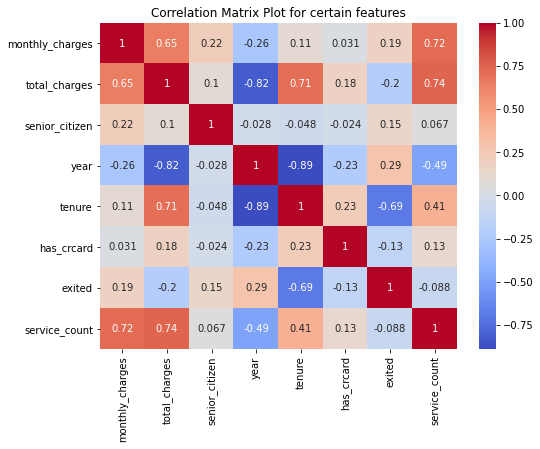

In [24]:
# correlation matrix of features
plt.figure(figsize=(8, 6))
corrMatrix = telecom_df.corr()
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Plot for certain features')
plt.show();

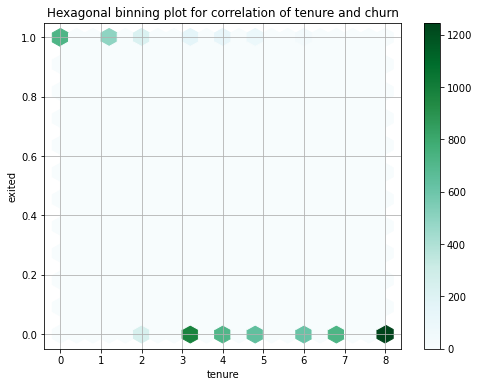

In [25]:
# correlation of tenure and churn
telecom_df.plot(
    x='tenure', y='exited', title = 'Hexagonal binning plot for correlation of tenure and churn', 
    kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True
);

From the correlation plot, we can see that there is a strong negative correlation between `tenure` and `exited` (or churn). Customers with less tenure are more likely to churn than well-established customers. To prevent churn, Interconnect telecom must introduce promotion and increase service offering in other to keep customers for longer. We see that the longer a customer stays with Interconnect telecoms, the less likely the customers churn. Whether a customer made subscription on a month-to-month basis did not really affect churn. 

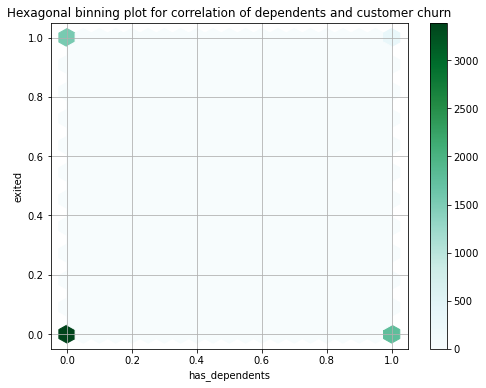

In [26]:
# correlation of dependents on customer churn
telecom_df['has_dependents'] = [1 if x != 'No' else 0 for x in telecom_df['dependents']]
telecom_df.plot(
    x='has_dependents', y='exited', title = 'Hexagonal binning plot for correlation of dependents and customer churn', 
    kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True
);

We can see that more customers without dependents stayed longer with Interconnect telecoms than customers with dependent. This is reasonable because having dependent tends to increase your average expenses. It would make sense for Interconnect to target customers with less dependents. 

### Can contract type affect customer churn?

In [27]:
# effect of contract type on customer churn
contract_type_percent = telecom_df.groupby('type', as_index=False).agg({'exited': 'sum'}).sort_values(by='exited', ascending=False, ignore_index=True)
contract_type_effect = (telecom_df['type'].value_counts() / telecom_df['type'].value_counts().sum() * 100).tolist()
contract_type_percent['% exit percent'] = ['{:.2f}'.format(x) for x in contract_type_effect]
contract_type_percent

,type,exited,% exit percent
0,Month-to-month,1655,55.02
1,One year,166,24.07
2,Two year,48,20.91


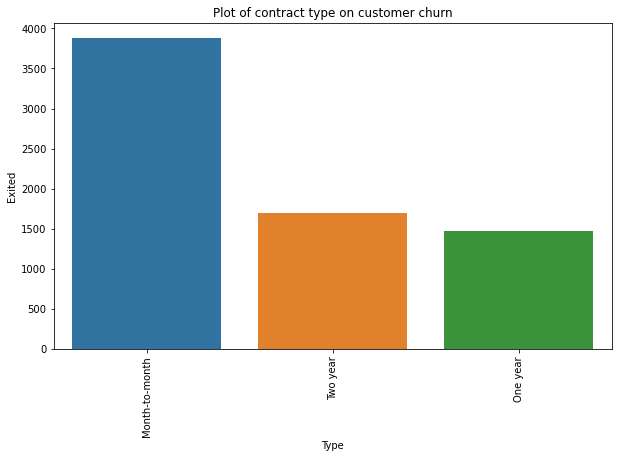

In [28]:
# plot of contract type on customer churn
plot_snsbar(telecom_df, 'type', 'exited', 'Plot of contract type on customer churn')

We visualized the contract type to see whether customers with shorter contract churn faster than customers with year-long contracts. Our analysis shows that customers with two-year long contract tends to stay longer while customers on a month-to-month contract type churned faster.

### What are the top 5 services offered?

In [29]:
# we create a copy of the dataframe to use for encoding
telecom_df_encode = telecom_df.copy()

# encoding services offered 
online_security = {'online_security':{'Yes': 1, 'No': 0}}
online_backup = {'online_backup':{'Yes': 1, 'No': 0}}
device_protection = {'device_protection':{'Yes': 1, 'No': 0}}
tech_support = {'tech_support':{'Yes': 1, 'No': 0}}
streaming_tv = {'streaming_tv':{'Yes': 1, 'No': 0}}
streaming_movies = {'streaming_movies':{'Yes': 1, 'No': 0}}

telecom_df_encode.replace(online_security, inplace =True)
telecom_df_encode.replace(online_backup, inplace =True)
telecom_df_encode.replace(device_protection, inplace =True)
telecom_df_encode.replace(tech_support, inplace =True)
telecom_df_encode.replace(streaming_tv, inplace =True)
telecom_df_encode.replace(streaming_movies, inplace =True)

telecom_services_data = telecom_df_encode[['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'exited']]
telecom_services_data = telecom_services_data.transpose()
telecom_services_data

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
online_security,0,1,1,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,1
online_backup,1,0,1,0,0,0,1,0,0,1,...,0,1,0,1,0,0,1,0,0,0
device_protection,0,1,0,1,0,1,0,0,1,0,...,0,1,0,1,0,1,1,0,0,1
tech_support,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
streaming_tv,0,0,0,0,0,1,1,0,1,0,...,0,1,1,1,0,1,1,0,0,1
streaming_movies,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,1,0,0,1
exited,0,0,1,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [30]:
# getting dataframe showing services and percentage count 
telecom_services_data['count'] = telecom_services_data.sum(axis=1)
telecom_services_df = telecom_services_data.reset_index(inplace=False)
telecom_services_df = telecom_services_df[['index', 'count']].rename(columns={'index': 'services'})
telecom_services_df['% service offered']  = telecom_services_df['count'] / telecom_services_df['count'].sum() * 100
telecom_services = telecom_services_df.copy()
telecom_services.sort_values('% service offered', axis = 0, ascending = False, inplace = True, ignore_index=True)
telecom_services

,services,count,% service offered
0,streaming_movies,2732,16.841327
1,streaming_tv,2707,16.687215
2,online_backup,2429,14.973493
3,device_protection,2422,14.930342
4,tech_support,2044,12.600173
5,online_security,2019,12.446061
6,exited,1869,11.521391


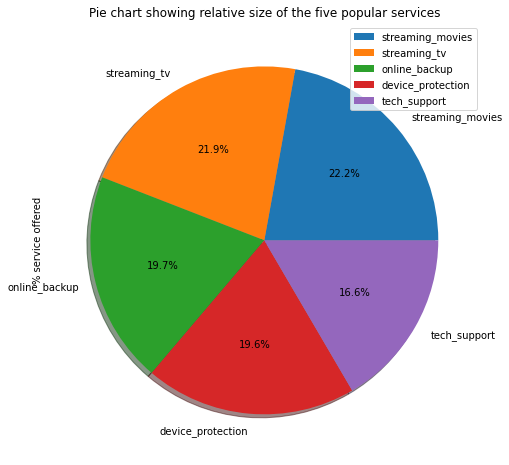

In [31]:
# plot of top 5 Interconnect service by count 
telecom_services_pie = telecom_services.head(5)
(telecom_services_pie.set_index('services').plot(y='% service offered', kind='pie', 
                      title = 'Pie chart showing relative size of the five popular services', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

From the plot of top 5 services offered by Interconnect telecoms, we can see that `streaming_tv`, `streaming_videos` are in high demand. 

### Can number of services offered affect customer churn?

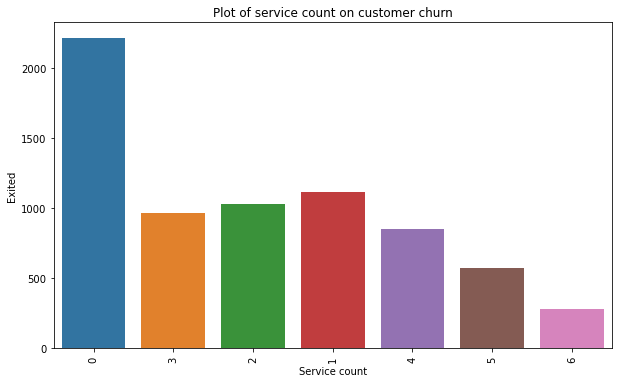

In [32]:
# plot of service count on customer churn
plot_snsbar(telecom_df, 'service_count', 'exited', 'Plot of service count on customer churn')

The service count has very weak correlation with customer churn. From the plot, we see that customers using between 5 and 6 services churned less whereas customers with no service churned the greatest. This indicates that having customers to sign up for more than 5 services at a time may likely prevent customer churn.

### What about the day of the week effect on customer churn?

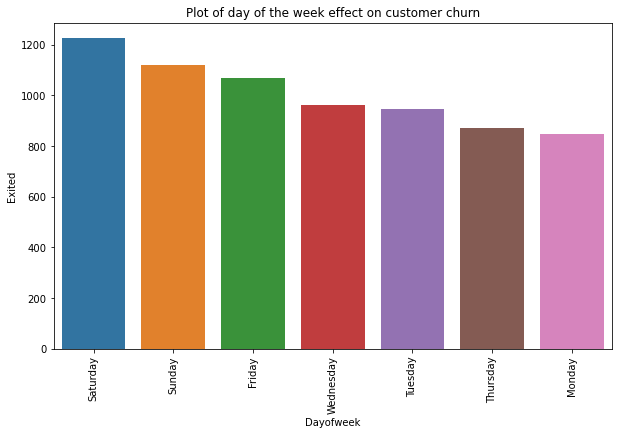

In [33]:
# plot to determine day of the week effect on customer churn
plot_snsbar(telecom_df, 'dayofweek', 'exited', 'Plot of day of the week effect on customer churn')

We can see that most churn occured during the weekend. With this knowledge, Interconnect telecom can introduce incentives and weekend service bonuses to ensure customers do not disconnect their services over the weekend.

### What months had the most churn and how can it be prevented?

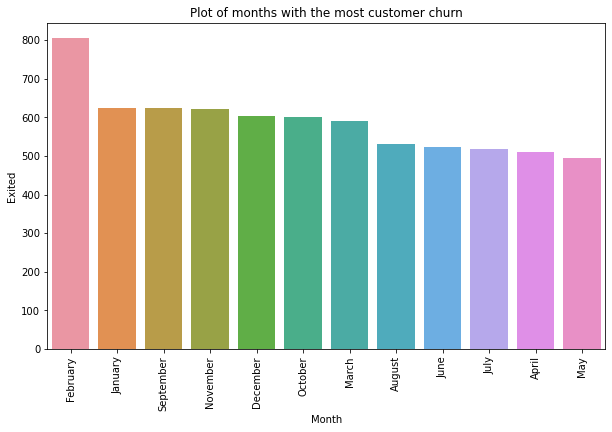

In [34]:
# plot to determine months with the most churn
plot_snsbar(telecom_df, 'month', 'exited', 'Plot of months with the most customer churn')

From the plot above, the months of February, September, November and December had the most churn. With this understanding, Interconnect telecoms can introduce several bonuses, free service plans, free movie streaming services or discounted TV streaming services for six months starting from September to February. This will prevent customer churn during those period.

#### Conclusion

We can conclude the following from the exploratory data analysis done:
 - Most of Interconnect customers prefer month-to-month payment with 61% of payment done using month-to-month
 - Payment made with electronic check had the highest total charges and thus will bring in the most revenue
 - Customers on a two-year contract have the highest total charges and bring in more total revenue than customers on a one year contract. 
 - Customers on a two-year contract churn less than other contract type.
 - Customers with more than 5 services at a time churn less 
 - Most churn occured at weekends.
 
 
**Action plan:**
 - The marketing team at Interconnect can introduce more two year contract plan to entice more customers to sign up for a two year contract.
 - Targeted marketing campaigns and promotional events should be done to promote the two-year plan to Interconnects customers
 - Customers should be encouraged to make payment using electronic check. This will increase Interconnect's revenue.
 - Incentivize services with serveral promos to induce more customers signing up for more services at a time.
 - Introduce serveral bonuses, free service plans, free streaming services or discounted TV streaming services for six months starting from September to February to prevent churn.
 - Special promotional events and services options should be introduced towards the end of the week to discourage client churn

<div class="alert alert-success">
<b>Reviewer's comment</b>

Nice EDA!

</div>

<div id="modeling_process">
    <h2>Modeling Process</h2> 
</div>

Here, we would train different models. We would be training a couple of tree-based models, gradient-boosted model and leaf-based model. The primary metric we chose to evaluate the model is AUC-ROC. The secondary metric is accuracy. AUC computes the area under the curve and the objective is to **maximize** this area. Accuracy tells us how often the classifier is correct and the objective is to **maximize** accuracy. 

### Feature Engineering for Machine Learning

We perform feature engineering to encode all categorical features to numeric. Encoding features makes them useful for machine learning. We would be applying one-hot encoding, target encoding and ordinal encoding depending on the machine learning algorithm. A summary of the result is shown here.

| Model type | Model | Encoding type | Highlight | Cons |
|:--- |:----|:---:|:---:| :--- |
| Statistical based| Logistic regression | One-hot encoding | Less prone to over-fitting | Can overfit in high dimensional datasets |
| Tree-based | Decision Tree | label encoding | Normalization or scaling of data not needed  | Prone to overfitting   |
|            | Random Forest | label encoding | Excellent predictive powers| Prone to overfitting    |
| Gradient-boosted | Catboost      | No encoding    | Can handle categorical data well |  Needs to build deep decision trees in features with high cardinality.     |
| Gradient boosted | XGBoost | One-hot encoding | Good execution and model performance | Cannot handle categorical features (need encoding) |
| Gradient-boosted | LightGBM | Ordinal encoding | Extremely fast | Needs encoding for categorical features    |

For tree based model such as decision tree and random forest, we make use of label encoding. For Logistic regression and the XGBoost, we make use of one-hot encoding. The XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. The CatBoost regressor has its own implementation for encoding of categorical features. In this case, we create a separate dataset without any encoding. Internally, catboost encodes the categorical features. Since one-hot encoding is not optimal for the LightGBM since it does its own encoding for categorical features, we apply OrdinalEncoder on the categorical features of LightGBM.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

- Note that one-hot encoding is not optimal for LightGBM. It does its own encoding for categorical features, with the only requirement being that categorical features being stored as integers (so we can apply OrdinalEncoder beforehand).
- On the other hand, it's better to use one-hot encoding for logistic regression

</div>

In [35]:
# drop unimportant features
df = telecom_df.drop(['customer_id', 'begin_date', 'end_date', 'end_date_value', 'dayofweek', 'month', 'year', 'tenure'], axis=1)

# declare variables for target and features
y = df.exited
X = df.drop(['exited'], axis=1)

# split data into 75% training and 25% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was split into train and test sets. Target variable fits the task

</div>

In [36]:
# create copy of initial split feature dataset
features_train = X_train.copy()
features_test = X_test.copy()

# select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'int32', 'float32']]

# list of categorical variables
s = (features_train.dtypes == 'object')
object_cols = list(s[s].index)
print('Categorical variables:')
print(object_cols)

Categorical variables:
['type', 'paperless_billing', 'payment_method', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'gender', 'partner', 'dependents', 'multiple_lines']


In [37]:
# Encoding features for machine learning

# Approach 1: Ordinal Encoding
# make a copy to avoid changing original data
label__X_train = features_train.copy()
label__X_test = features_test.copy()

# apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label__X_train[object_cols] = ordinal_encoder.fit_transform(features_train[object_cols])
label__X_test[object_cols] = ordinal_encoder.transform(features_test[object_cols])

# Approach 2: One-Hot Encoding
# one-hot encoding of categorical features
df_ohe = pd.get_dummies(df, drop_first=True)

# declare variables for target and features
y_ohe = df_ohe.exited
X_ohe = df_ohe.drop(['exited'], axis=1)

# split data into 75% training and 25% testing sets
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, test_size=0.25, random_state=12345)

# numerical features
numerical_cols = [cname for cname in X_train_ohe.columns if X_train_ohe[cname].dtype in ['float32', 'float64', 'int64', 'int32']]

# features scaling
scaler = StandardScaler()
scaler.fit(X_train_ohe[numerical_cols])
# transform the training set and the test set using transform()
X_train_ohe[numerical_cols] = scaler.transform(X_train_ohe[numerical_cols])
X_test_ohe[numerical_cols]  = scaler.transform(X_test_ohe[numerical_cols])

#### Conclusion

We split the data into 75%  training and 25% testing sets. We applied both ordinal encoding and one-hot encoding to the features. We scaled the data after one-hot encoding using the standard scaler function. Next we are going to examine class imbalance and improve the model quality if class imbalance exist.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Categorical features were encoded

</div>

### Examine the balance of class

In [38]:
# function to calculate model evaluation metrics
def print_model_evaluation(y_test, test_predictions):
    print("\033[1m" + 'F1 score: ' + "\033[0m", '{:.3f}'.format(f1_score(y_test, test_predictions)))
    print("\033[1m" + 'Accuracy Score: ' + "\033[0m", '{:.2%}'.format(accuracy_score(y_test, test_predictions)))
    print("\033[1m" + 'Precision: ' + "\033[0m", '{:.3f}'.format(precision_score(y_test, test_predictions)))
    print("\033[1m" + 'Recall: ' + "\033[0m", '{:.3f}'.format(recall_score(y_test, test_predictions)))
    print("\033[1m" + 'Balanced Accuracy Score: ' + "\033[0m", '{:.2%}'.format(balanced_accuracy_score(y_test, test_predictions)))
    print("\033[1m" + 'AUC-ROC Score: ' + "\033[0m", '{:.2%}'.format(roc_auc_score(y_test, test_predictions)))
    print()
    print("\033[1m" + 'Confusion Matrix' + "\033[0m")
    print('-'*50)
    print(confusion_matrix(y_test, test_predictions))
    print()
    print("\033[1m" + 'Classification report' + "\033[0m")
    print('-'*50)
    print(classification_report(y_test, test_predictions))
    print()

In [39]:
# function to evaluate classification models
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

#### Baseline Model

In [40]:
# baseline model using a dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_train, y_train)
dummy_clf_test_predictions = dummy_clf.predict(features_test)

In [41]:
# evaluate baseline model
print_model_evaluation(y_test, dummy_clf_test_predictions)

F1 score:  0.000
Accuracy Score:  73.08%
Precision:  0.000
Recall:  0.000
Balanced Accuracy Score:  50.00%
AUC-ROC Score:  50.00%

Confusion Matrix
--------------------------------------------------
[[1287    0]
 [ 474    0]]

Classification report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1287
           1       0.00      0.00      0.00       474

    accuracy                           0.73      1761
   macro avg       0.37      0.50      0.42      1761
weighted avg       0.53      0.73      0.62      1761




The baseline model predicts the most frequent class in this case "0". Looking at the baseline model report, we can see that the accuracy is low at 73% and the AUC-ROC score is 50%. This represents the baseline so we should expect our models to perform better.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, we have a baseline! 

</div>

#### Sanity check with Logistic regression

0    0.760363
1    0.239637
dtype: float64

Accuracy score before upsampling: 0.777


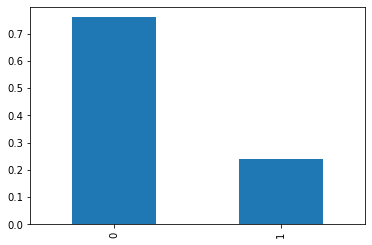

In [42]:
# sanity check
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(label__X_train, y_train) # train the model 
test_predictions = pd.Series(model.predict(label__X_test))
class_frequency = test_predictions.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');
print()
print('Accuracy score before upsampling: {:.3f}'.format(accuracy_score(y_test, test_predictions)))

We assess the sanity of the model by checking how often the target feature contains the class "1" or "0". We can observe the class imbalance in the predicted testing set. Next we try to improve the quality of the model using the upsampling approaches to fix class imbalance.

#### Upsampling to fix class imbalance

In [43]:
# function to perform upsampling 
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )
    return features_upsampled, target_upsampled

# new training set created
features_upsampled, target_upsampled = upsample(
    label__X_train, y_train, 5
)

1    0.53322
0    0.46678
dtype: float64

Accuracy score after upsampling: 0.669


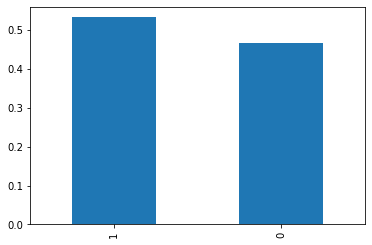

In [44]:
# sanity check after upsampling
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled) # train the model 
test_predictions = pd.Series(model.predict(label__X_test))
class_frequency = test_predictions.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');
print()
print('Accuracy score after upsampling: {:.3f}'.format(accuracy_score(y_test, test_predictions)))

Using upsampling technique, we have been able to solve the problem of class imbalance. The class has been balanced even though the model accuracy did not improve.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

While there is indeed class imbalance in our dataset, I'm not sure why you're measuring it by calculating the numbers on test set predictions and what kind of improvement we're supposed to see

</div>

<div id="model_training">
    <h2>Model Training</h2> 
</div>

In [45]:
# function to plot confusion matrix
def plot_confusion_matrix(y, y_predict):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not churn', 'churn']); ax.yaxis.set_ticklabels(['did not churn', 'churn'])

In [46]:
# upsampled train dataset for label encoded trainset
label__X_train_upsampled, y_train_upsampled = upsample(
    label__X_train, y_train, 5
)

# upsampled train dataset for one-hot encoded data
X_train_ohe_upsampled, y_train_ohe_upsampled = upsample(
    X_train_ohe, y_train_ohe, 5
)

# upsampled train dataset
X_train_upsampled, y_train_upsampled = upsample(
    X_train, y_train, 5
)

#### Logistic Regression

In [47]:
%%time

# define hyperparameters to tune 
grid_logreg = {
    "C": [0.01, 0.1, 1],
    'penalty': ['l2'], # l1 lasso l2 ridge
    'solver': ['lbfgs']
}

# define the model
logreg_clf = LogisticRegression(random_state = 12345)
# define the grid search object
grid_search_logreg = GridSearchCV(
    estimator = logreg_clf,
    param_grid = grid_logreg,
    scoring = 'roc_auc',
    cv = 10
)
# execute search
logreg_cv = grid_search_logreg.fit(X_train_ohe, y_train_ohe)
# summarize result
print('The best hyperparameters are: {}'.format(logreg_cv.best_params_))

The best hyperparameters are: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Wall time: 792 ms


In [48]:
# function to train model and make predictions
def train_logistic_regression_classifier(X_train, y_train):
    """This function trains a logistic regression model"""
    global logreg_model
    # build the model
    logreg_model = LogisticRegression(**grid_search_logreg.best_params_)
    logreg_model.fit(X_train, y_train) # train the model 
    
def logistic_regression_classifier_prediction(X_test, y_test):
    """
    This function is used to make prediction 
    using a logistic regression classification model
    """
    global logreg_pred
    logreg_pred = logreg_model.predict(X_test)
    # determine AUC-ROC score
    print("\033[1m" + 'AUC-ROC Score and Accuracy using Random Forest Classifier : ' + "\033[0m")
    print('AUC-ROC Score: {:.2%}'.format(roc_auc_score(y_test, logreg_pred)))
    # determine accuracy for logistic regression classifier
    logreg_accuracy = accuracy_score(y_test, logreg_pred)
    print('Accuracy score: {:.2%}'.format(logreg_accuracy))
    print()
    # get importance for logistic regression
    log_model_importance = pd.DataFrame(
        logreg_model.coef_[0], index=X_train_ohe.columns, columns=["Importance"]
    )
    # plot the chart
    log_model_importance.sort_values(by="Importance").plot(kind="bar", figsize=(12, 6))
    plt.xticks(rotation=45, ha="right", rotation_mode="anchor", fontsize=13)
    plt.xlabel("Logistic Regression Classifier Feature Importance")
    plt.show()

In [49]:
%%time
# train logistic regression classifier
train_logistic_regression_classifier(X_train_ohe, y_train_ohe)

Wall time: 68.8 ms


AUC-ROC Score and Accuracy using Random Forest Classifier : 
AUC-ROC Score: 72.10%
Accuracy score: 80.07%



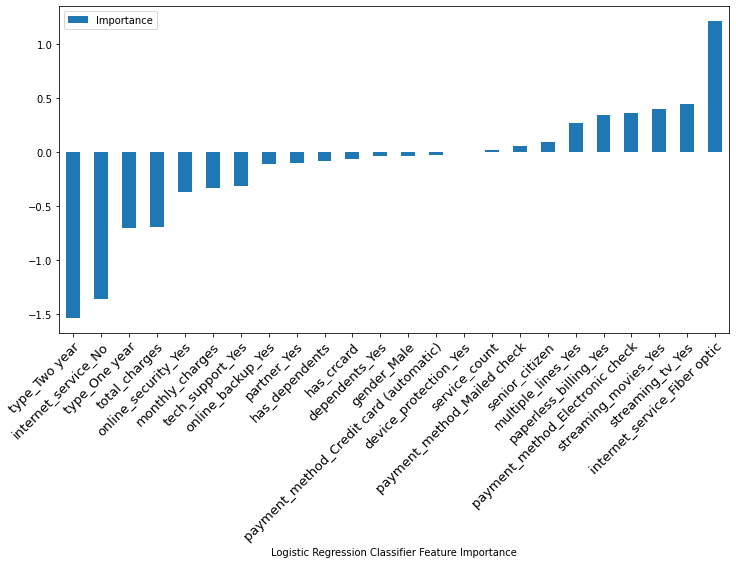

Wall time: 364 ms


In [50]:
%%time
# make predictions with logistic regression classifier for test data
logistic_regression_classifier_prediction(X_test_ohe, y_test_ohe)

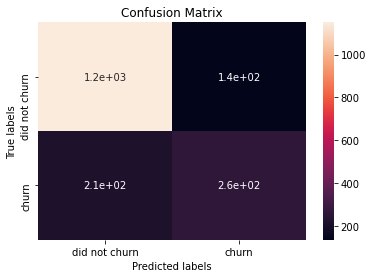

In [51]:
# plot confusion matrix
plot_confusion_matrix(y_test, logreg_pred)

#### Decision Tree Classifier

In [52]:
%%time
# hyperparameter optimization for Decision tree classifier

# define hyperparameters to tune
grid_dt = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [None, 2, 4, 8, 10, 12],
    "min_samples_split" : [2, 4, 8, 16],
    "min_samples_leaf" : [2, 4, 6]
}
# define the model 
dt_clf = DecisionTreeClassifier(random_state = 12345)
# define the grid search
grid_search_dt = GridSearchCV(estimator=dt_clf, param_grid = grid_dt, cv=5, scoring = 'roc_auc')
# execute search
dt_cv = grid_search_dt.fit(label__X_train, y_train)
# summarize result
print('The best hyperparameters are: {}'.format(dt_cv.best_params_))

The best hyperparameters are: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}
Wall time: 11 s


In [53]:
# function to train model and make predictions
def train_decision_tree_classifier(X_train, y_train):
    """This function trains a decision tree classification model"""
    global dt_model
    # build the model
    dt_model = DecisionTreeClassifier(**grid_search_dt.best_params_)
    dt_model.fit(X_train, y_train) # train the model 
    
def decision_tree_classifier_prediction(X_test, y_test):
    """
    This function is used to make prediction 
    using a decision tree classification model
    """
    global dt_pred
    dt_pred = dt_model.predict(X_test)
    # determine AUC-ROC score
    print("\033[1m" + 'AUC-ROC Score and Accuracy using Decision Tree Classifier: ' + "\033[0m")
    print('AUC-ROC Score: {:.2%}'.format(roc_auc_score(y_test, dt_pred)))
    # determine accuracy for decision tree classifier
    dt_accuracy = accuracy_score(y_test, dt_pred)
    print('Accuracy score: {:.2%}'.format(dt_accuracy))
    print()
    # feature importance from decision tree classifier
    sorted_feature_importance = dt_model.feature_importances_.argsort()
    plt.figure(figsize=(8,6))
    plt.barh(label__X_train.columns[sorted_feature_importance], 
             dt_model.feature_importances_[sorted_feature_importance], 
             color='turquoise')
    plt.xlabel("Decision Tree Classifier Feature Importance")

In [54]:
%%time
# train decision tree classifier
train_decision_tree_classifier(label__X_train, y_train)

Wall time: 28.9 ms


AUC-ROC Score and Accuracy using Decision Tree Classifier: 
AUC-ROC Score: 66.59%
Accuracy score: 77.17%

Wall time: 27.9 ms


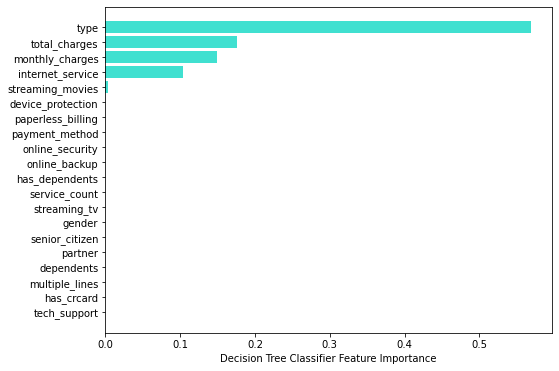

In [55]:
%%time
# make predictions with decision tree classifier for test data
decision_tree_classifier_prediction(label__X_test, y_test)

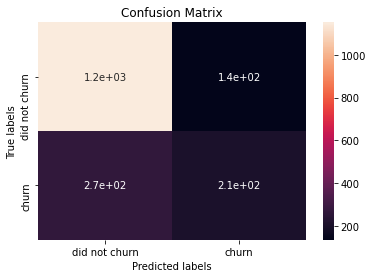

In [56]:
# plot confusion matrix
plot_confusion_matrix(y_test, dt_pred)

#### Random Forest Classifier

In [57]:
%%time
# hyperparameter optimization

# define hyperparameters to tune
grid_rf = {
    "criterion" : ["gini", "entropy"],
    "n_estimators" : [10, 25, 50, 100],
    "max_depth" : [None, 2, 4, 8, 10, 12],
    "min_samples_leaf" : [2, 4, 6]
}
# define the model 
rf_clf = RandomForestClassifier(random_state = 12345)
# define the grid search
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid = grid_rf, cv=5, scoring = 'roc_auc')
# execute search
rf_cv = grid_search_rf.fit(label__X_train, y_train)
# summarize result
print('The best hyperparameters are: {}'.format(rf_cv.best_params_))

The best hyperparameters are: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 6, 'n_estimators': 100}
Wall time: 1min 40s


In [58]:
# function to train model and make predictions
def train_random_forest_classifier(X_train, y_train):
    """This function trains a random forest model"""
    global rf_model
    # build the model
    rf_model = RandomForestClassifier(**grid_search_rf.best_params_)
    rf_model.fit(X_train, y_train) # train the model 
    
def random_forest_classifier_prediction(X_test, y_test):
    """
    This function is used to make prediction 
    using a random forest classification model
    """
    global rf_pred
    rf_pred = rf_model.predict(X_test)
    # determine AUC-ROC score
    print("\033[1m" + 'AUC-ROC Score and Accuracy using Random Forest Classifier' + "\033[0m")
    print('AUC-ROC Score: {:.2%}'.format(roc_auc_score(y_test, rf_pred)))
    # determine accuracy for random forest classifier
    rf_accuracy = accuracy_score(y_test, rf_pred)
    print('Accuracy score: {:.2%}'.format(rf_accuracy))
    print()
    # feature importance from random forest classifier
    sorted_feature_importance = rf_model.feature_importances_.argsort()
    plt.figure(figsize=(8,6))
    plt.barh(label__X_train.columns[sorted_feature_importance], 
             rf_model.feature_importances_[sorted_feature_importance], 
             color='turquoise')
    plt.xlabel("Random Forest Classifier Feature Importance")

In [59]:
%%time
# train random forest classifier
train_random_forest_classifier(label__X_train, y_train)

Wall time: 349 ms


AUC-ROC Score and Accuracy using Random Forest Classifier
AUC-ROC Score: 69.27%
Accuracy score: 79.33%

Wall time: 68.8 ms


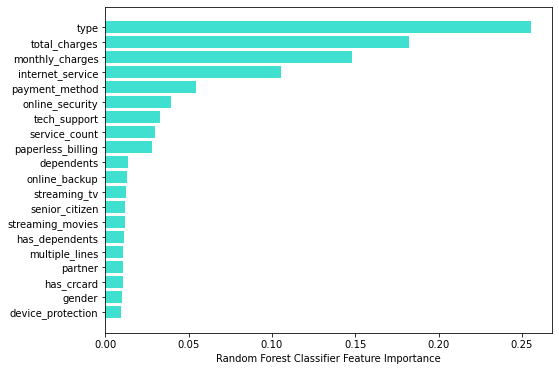

In [60]:
%%time
# make predictions with random forest regressor for test data
random_forest_classifier_prediction(label__X_test, y_test)

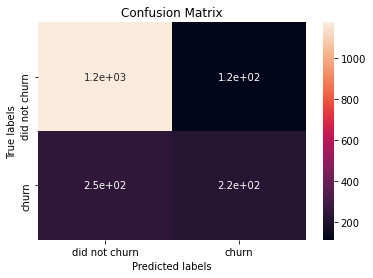

In [61]:
# plot confusion matrix
plot_confusion_matrix(y_test, rf_pred)

#### CatBoost Classifier

In [62]:
%%time
# hyperparameter optimization

# define hyperparameters to tune
grid_cb = {'learning_rate': [0.001, 0.01, 0.5],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]
       }
# define the model 
cb_clf = CatBoostClassifier(
    iterations=200,
    cat_features = object_cols,
    logging_level = 'Silent',
    eval_metric='AUC',
    early_stopping_rounds = 50,
    random_state = 12345)
# define the grid search
grid_search_cb = GridSearchCV(estimator = cb_clf, param_grid = grid_cb, scoring="roc_auc", cv=5)
# execute search
cb_cv = grid_search_cb.fit(X_train, y_train)
# summarize result
print('The best hyperparameters are: {}'.format(cb_cv.best_params_))

The best hyperparameters are: {'depth': 6, 'l2_leaf_reg': 3, 'learning_rate': 0.01}
Wall time: 18min 15s


In [63]:
# function to train model and make predictions
def train_catboost_classifier(X_train, y_train, X_test, y_test):
    """This function trains a catboost classifier model"""
    global cb_model
    # build the model
    cb_model = CatBoostClassifier(**grid_search_cb.best_params_)
    cb_model.fit(X_train, y_train, cat_features = object_cols, eval_set=(X_test, y_test), verbose=False, plot=False) # train the model 
    
def catboost_classifier_prediction(X_test, y_test):
    """
    This function is used to make prediction 
    using the catboost classifier model
    """
    global cb_pred
    cb_pred = cb_model.predict(X_test)
    # determine AUC-ROC score
    print("\033[1m" + 'AUC-ROC Score and Accuracy using CatBoost Classifier' + "\033[0m")
    print('AUC-ROC Score: {:.2%}'.format(roc_auc_score(y_test, cb_pred)))
    # determine accuracy for CatBoost classifier
    cb_accuracy = accuracy_score(y_test, cb_pred)
    print('Accuracy score: {:.2%}'.format(cb_accuracy))
    print()
    # feature importance from CatBoost classifier 
    sorted_feature_importance = cb_model.feature_importances_.argsort()
    plt.figure(figsize=(8,6))
    plt.barh(X_train.columns[sorted_feature_importance], 
             cb_model.feature_importances_[sorted_feature_importance], 
             color='turquoise')
    plt.xlabel("CatBoost Feature Importance")

In [64]:
%%time
# train catboost classifier model
train_catboost_classifier(X_train, y_train, X_test, y_test)

Wall time: 21.5 s


AUC-ROC Score and Accuracy using CatBoost Classifier
AUC-ROC Score: 70.83%
Accuracy score: 79.67%

Wall time: 38.9 ms


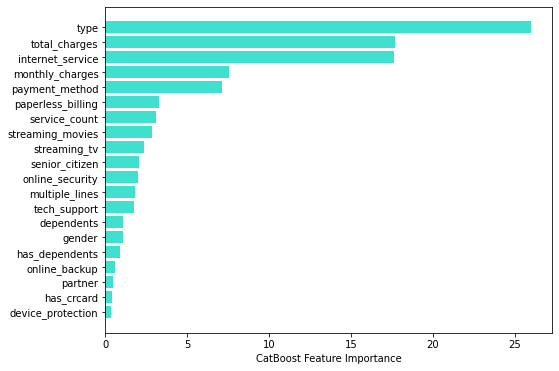

In [65]:
%%time
# make predictions with catboost classifier for test data
catboost_classifier_prediction(X_test, y_test)

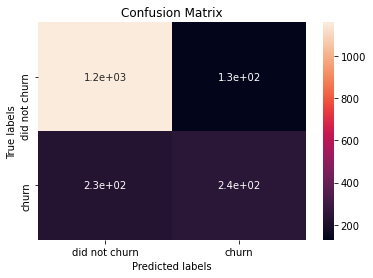

In [66]:
# plot confusion matrix
plot_confusion_matrix(y_test, cb_pred)

#### XGBoost Classifier

In [67]:
%%time
# hyperparameter optimization for XGBoost Classifier

# define hyperparameters to tune
grid_xgb = {'learning_rate': [0.001, 0.01, 0.1, 0.3], 
            'max_depth': [2, 4, 6, 10],
            'n_estimators': [50, 100, 200, 500]
           }
# define the model 
xgb_clf = XGBClassifier(random_state = 12345, verbosity = 0)
# define the grid search
grid_search_xgb = GridSearchCV(
    estimator = xgb_clf, 
    param_grid = grid_xgb, 
    scoring = "roc_auc", 
    cv = 5, 
    n_jobs = 1
)
# execute search
xgb_cv = grid_search_xgb.fit(X_train_ohe, y_train_ohe)
# summarize result
print('The best hyperparameters are: {}'.format(xgb_cv.best_params_))

The best hyperparameters are: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Wall time: 4min 9s


In [68]:
# function to train model and make predictions
def train_xgboost_classifier(X_train, y_train):
    """This function trains an XGBoost classifier"""
    global xgb_model
    # build the model
    xgb_model = XGBClassifier(**grid_search_xgb.best_params_)
    xgb_model.fit(X_train, y_train) # train the model 
    
def xgboost_classifier_prediction(X_test, y_test):
    """
    This function is used to make prediction 
    using the XGBoost classifier model
    """
    global xgb_pred
    xgb_pred = xgb_model.predict(X_test)
    # determine AUC-ROC score
    print("\033[1m" + 'AUC-ROC Score and Accuracy using XGBoost Classifier' + "\033[0m")
    print('AUC-ROC Score: {:.2%}'.format(roc_auc_score(y_test, xgb_pred)))
    # determine accuracy for XGBoost classifier
    xgb_accuracy = accuracy_score(y_test, xgb_pred)
    print('Accuracy score: {:.2%}'.format(xgb_accuracy))
    print()
    # feature importance from XGBoost classifier
    sorted_feature_importance = xgb_model.feature_importances_.argsort()
    plt.figure(figsize=(8,6))
    plt.barh(X_train_ohe.columns[sorted_feature_importance], 
             xgb_model.feature_importances_[sorted_feature_importance], 
             color='turquoise')
    plt.xlabel("XGBoost Classifier Feature Importance")

In [69]:
%%time
# train xgboost classifier
train_xgboost_classifier(X_train_ohe, y_train_ohe)

Wall time: 161 ms


AUC-ROC Score and Accuracy using XGBoost Classifier
AUC-ROC Score: 69.39%
Accuracy score: 79.22%

Wall time: 104 ms


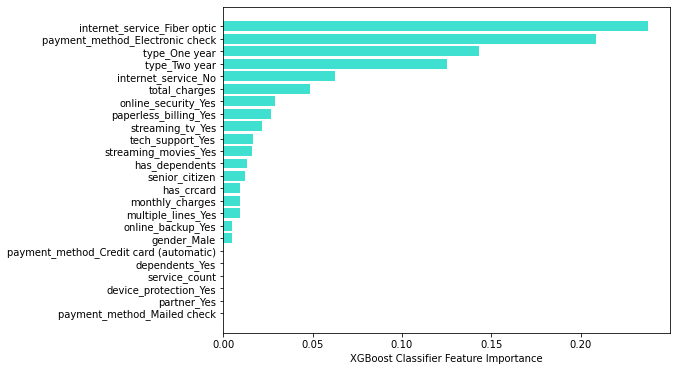

In [70]:
%%time
# make predictions with xgboost classifier for test data
xgboost_classifier_prediction(X_test_ohe, y_test_ohe)

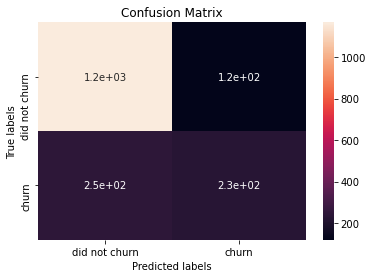

In [71]:
# plot confusion matrix
plot_confusion_matrix(y_test_ohe, xgb_pred)

#### LightGBM Classifier

In [72]:
%%time
# hyperparameter optimization for LightGBM classifier

# define hyperparameters to tune
grid_lgbm = {'learning_rate': [0.001, 0.01, 0.05, 0.1],
             'n_estimators': [50, 100, 500],
             'num_leaves': [5, 10, 20, 31]
            }
# define the model 
lgbm_clf = LGBMClassifier(random_state = 12345)
# define the grid search
grid_search_lgbm = GridSearchCV(
    estimator = lgbm_clf, 
    param_grid = grid_lgbm, 
    scoring = "accuracy", 
    cv = 5, 
    n_jobs = 1
)
# execute search
lgbm_cv = grid_search_lgbm.fit(label__X_train, y_train)
# summarize result
print('The best hyperparameters are: {}'.format(lgbm_cv.best_params_))

The best hyperparameters are: {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 5}
Wall time: 49.1 s


In [73]:
# function to train model and make predictions
def train_lightGBM_classifier(X_train, y_train):
    """This function trains a LightGBM classifier"""
    global lgbm_model
    # build the model
    lgbm_model = LGBMClassifier(**grid_search_lgbm.best_params_)
    lgbm_model.fit(X_train, y_train) # train the model 
    
def lightGBM_classifier_prediction(X_test, y_test):
    """
    This function is used to make prediction 
    using the LightGBM classifier model
    """
    global lgbm_pred
    lgbm_pred = lgbm_model.predict(X_test)
    # determine AUC-ROC score
    print("\033[1m" + 'AUC-ROC Score and Accuracy using LightGBM Classifier' + "\033[0m")
    print('AUC-ROC Score: {:.2%}'.format(roc_auc_score(y_test, lgbm_pred)))
    # determine accuracy for LightGBM classifier
    lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
    print('Accuracy score: {:.2%}'.format(lgbm_accuracy))
    print()
    # feature importance from LightGBM classifier
    sorted_feature_importance = lgbm_model.feature_importances_.argsort()
    plt.figure(figsize=(8,6))
    plt.barh(label__X_train.columns[sorted_feature_importance], 
             lgbm_model.feature_importances_[sorted_feature_importance], 
             color='turquoise')
    plt.xlabel("LightGBM Classifier Feature Importance")

In [74]:
%%time
# train lightGBM classifier
train_lightGBM_classifier(label__X_train, y_train)

Wall time: 94.7 ms


AUC-ROC Score and Accuracy using LightGBM Classifier
AUC-ROC Score: 69.87%
Accuracy score: 79.33%

Wall time: 63.8 ms


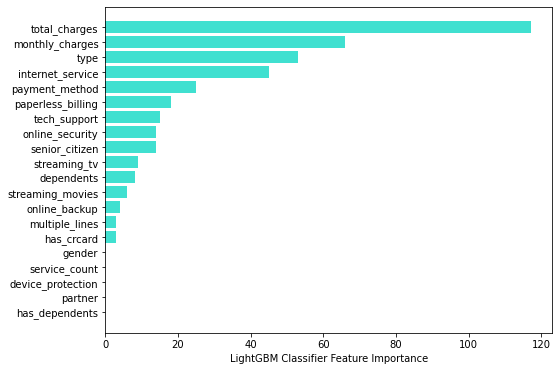

In [75]:
%%time
# make predictions with lightGBM classifier for test data
lightGBM_classifier_prediction(label__X_test, y_test)

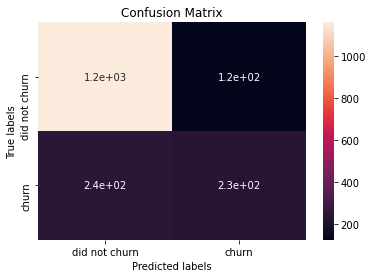

In [76]:
# plot confusion matrix
plot_confusion_matrix(y_test_ohe, lgbm_pred)

#### Conclusion

We tuned, trained and made predictions using six models. The Decision tree model and the LightGBM seems to be the fastest algorithm. We chose the best performing model and use it for testing the test dataset.

<div id="model_analysis">
    <h2>Model Analysis</h2> 
</div>

Here we choose the best model that performs best on the training dataset. We would be analyzing the speed and quality of the trained models.

In [77]:
# determine best algorithm
models = {'LogisticRegression':logreg_cv.best_score_,
          'DecisionTree':dt_cv.best_score_,
          'RandomForest':rf_cv.best_score_,
          'XGBoost': xgb_cv.best_score_,
          'LightGBM': lgbm_cv.best_score_,
          'CatBoost': cb_cv.best_score_
         }

bestalgorithm = max(models, key=models.get)
print('Best model is', bestalgorithm,'with a score of', models[bestalgorithm])
if bestalgorithm == 'LogisticRegression':
    print('Best params is :', logreg_cv.best_params_)
if bestalgorithm == 'DecisionTree':
    print('Best params is :', dt_cv.best_params_)
if bestalgorithm == 'RandomForest':
    print('Best params is :', rf_cv.best_params_)
if bestalgorithm == 'XGBoost':
    print('Best params is :', xgb_cv.best_params_)
if bestalgorithm == 'LightGBM':
    print('Best params is :', lgbm_cv.best_params_)
if bestalgorithm == 'CatBoost':
    print('Best params is :', cb_cv.best_params_)

Best model is XGBoost with a score of 0.8471842193916993
Best params is : {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}


#### Conclusion

Here, different classification models were trained and tested. A summary of the models, their respective AUC-ROC and accuracy score, the time it took to train and test the model is shown below. The best model that performed well on the training dataset is the XGBoost classifier. We used the result from this model as our final model.

|Models | Hyperparameter tuning time | Training time | Prediction time | AUC-ROC score | Accuracy score|
|:----|:-----:|:-----|:-----|:-----|:-----|
| Logistic Regression | 792 ms | 68.8 ms | 364 ms | 72.10 % | 80.07 % |
| Decision Tree Classifier| 11 s | 28.9 ms | 27.9 ms | 66.59 % | 77.17 % |
| Random Forest Classifier | 1min 40s | 349 ms | 68.8 ms | 69.27 % | 79.33 % |
| CatBoost Classifier | 18min 15s | 21.5 s | 38.9 ms | 70.83 % | 79.67 % |
| XGBoost Classifier  | 4min 9s | 161 ms | 104 ms | 69.39 % | 79.22 % |
| LightGBM Classifier | 49.1 s  | 94.7 ms | 63.8 ms | 69.87 % | 79.33 % |

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

It's great that you tried a few different models and tuned their hyperparameters using a cross-validated grid search, but unfortunately due to target leakage problem described above, the scores we're getting are not representative of the models' real world performance. Please fix the data leakage problem and check the results

</div>

<div class="alert alert-info">
<b>Student's comment</b>

Fixed!!!. I have fixed the data leakage. Thanks for pointing that out. I didn't even know that was an issue. 
</div>

<div class="alert alert-danger">
<b>Reviewer's comment V2</b>

Ok! Unfortunately, now none of the models beats the required threshold of 0.75 ROC-AUC. I suggest two things:
    
- I just noticed that you're calculating the ROC-AUC score using binary predictions (i.e. produced using method `predict`), which underestimates the ROC-AUC. To get the correct ROC-AUC values, we need to use probabilities (method `predict_proba`)
- Make use of `tenure` feature: like I mentioned earlier, by itself (i.e. without `begin_date` components) it doesn't cause target leakage, so it's safe to use

</div>

<div id="model_testing">
    <h2>Model Testing</h2> 
</div>

The XGBoost classifier is chosen as the model for the final testing for this task because of it has the lowest tuning and prediction time. Using this best performing model, we evaluate on the test dataset.

AUC-ROC Score and Accuracy using XGBoost Classifier
AUC-ROC Score: 69.39%
Accuracy score: 79.22%



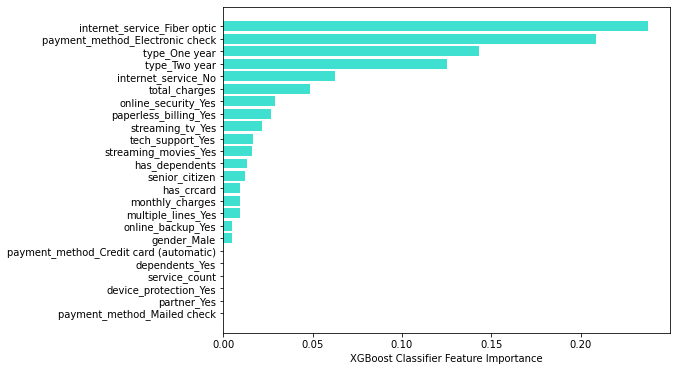

In [80]:
#%%time
# make predictions with xgboost classifier for test data
xgboost_classifier_prediction(X_test_ohe, y_test_ohe)

#### Conclusion

Using the XGBoost classifier, we obtained an accuracy score of 79.22 % and an AUC-ROC score of 0.69 for the test set. From the feature importance for the XGBoost algorithm, we can see that the top most important features are the internet service Fiber Optic, payment method via electronic check type, total charges.  

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Doesn't the 100% result look suspicious? :)

</div>

<div id="overall_conclusion">
    <h2>Overall Conclusion</h2> 
</div>

We looked into the general information about the dataset. We checked for missing values and duplicates. We observed that there are no missing values. We merged the dataset and procedded to change datatype. We carried out exploratory data analysis and found out that:
 - Most of Interconnect customers prefer month-to-month payment with 61% of payment done using month-to-month
 - Payment made with electronic check had the highest total charges and thus will bring in the most revenue
 - Customers on a two-year contract have the highest total charges and bring in more total revenue than customers on a one year contract. 
 - Customers on a two-year contract churn less than other contract type.
 - Customers with more than 5 services at a time churn less 
 - Most churn occured at weekends.
 
Based on the observation, Interconnect's action plan should be:
 - The marketing team at Interconnect can introduce more two year contract plan to entice more customers to sign up for a two year contract.
 - Targeted marketing campaigns and promotional events should be done to promote the two-year plan to Interconnects customers
 - Customers should be encouraged to make payment using electronic check. This will increase Interconnect's revenue.
 - Incentivize services with serveral promos to induce more customers signing up for more services at a time.
 - Introduce serveral bonuses, free service plans, free streaming services or discounted TV streaming services for six months starting from September to February to prevent churn.
 - Special promotional events and services options should be introduced towards the end of the week to discourage client churn

We split the data into 75% training and 25% testing sets. We used AUC-ROC as our primary metric and accuracy as the secondary metric to predict customer churn. We apply encoding different kind of encoding based on the algorithm to be used. We scale the data by applying standard scaler function to the features. We checked for class imbalance and used the upsampling technique to remove imbalance in the data. We trained different tree based model and gradient boosting model. We applied hyperparameter tuning to tune our different model and cross validation during sampling of data for machine learning. We choose the best performing models on the training accuracy and AUC-ROC metric. The best model in this case was the XGBoost algorithm. The XGBoost algorithm predicted an AUC-ROC score of 0.69 and an accuracy of 79.22 %. We were able to develop a model that will prevent customer churn by helping Interconnect telecom forecast customer churn. 